

Lleve a cabo el análisis de la serie **precipitación en Londres** en **R** o en **Python** como se indica.

Basado en el archivo `m−precipitationLondon.txt`, donde se encuentra la serie **precipitación mensual** desde **Enero de 1983 hasta Abril de 1993**, lleve a cabo el siguiente análisis (envíe al correo un archivo **HTML** con el análisis) **justificando con claridad**:

1.  **Proponga dos modelos** de series de tiempo de la familia **ARMA(p, q)**. No tienen por qué ser mixtos.
2.  **Lleve a cabo la estimación de los parámetros** de los 2 modelos propuestos en 1 para la serie de tiempo.
3.  Use la función `predict` del paquete `stats` o `forecast` del paquete `forecast` en **R**; o el método `.forecast` sobre el objeto que fue ajustado en **Python** para llevar la **validación cruzada** y elegir el mejor modelo tal que minimice el **error de predicción un paso adelante**. Use el método de **Rolling** para obtener el **error cuadrático medio un paso adelante**. El conjunto de datos inicial de **entrenamiento es T = 100** y los restantes **36** son los **datos de prueba**. Cada vez debe estimar los parámetros del modelo propuesto en 1. **No debe identificar un modelo nuevo cada vez, sólo debe estimar sus parámetros**.

¿Qué conclusión puede dar?


,Precipitación
Fecha,
1983-01-01,38.5
1983-02-01,42.4
1983-03-01,61.5
1983-04-01,104.5
1983-05-01,166.8


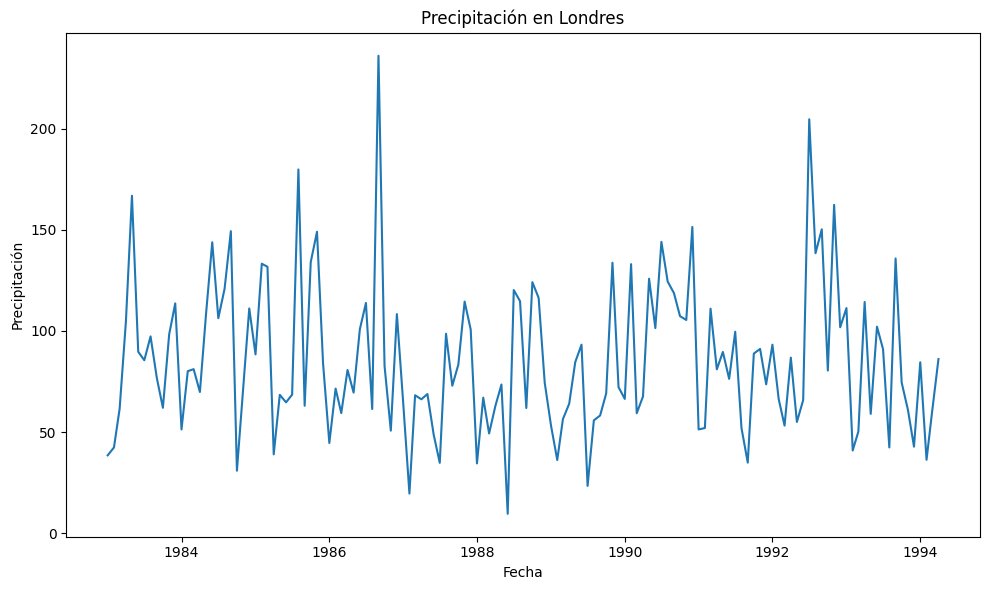

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./data/m-precipitationLondon.txt", header=None)

# Crear un rango de fechas de 136 meses (suponiendo que comienzas en enero de 1983)
date_range = pd.date_range(start='1983-01-01', periods=len(data), freq='MS')

# Asignar el rango de fechas como índice al DataFrame
data['Fecha'] = date_range
data.columns = ['Precipitación', 'Fecha']

# Establecer la columna 'Fecha' como índice
data.set_index('Fecha', inplace=True)
data.index.freq = 'MS'

display(data.head())

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Precipitación'], label='Precipitacion')
plt.xlabel('Fecha')
plt.ylabel('Precipitación')
plt.title('Precipitación en Londres')

plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Búsqueda de los dos mejores modelos minimizando el AIC
best_models = []  # Lista para almacenar los mejores modelos con su AIC y órdenes

# Definir los rangos de p y q
p_range = range(0, 6)  # p desde 0 hasta 5
q_range = range(0, 6)  # q desde 0 hasta 5

# Bucle sobre las combinaciones de p y q
for p in p_range:
    for q in q_range:
        try:
            # Ajustar el modelo ARMA(p, q)
            model = ARIMA(data['Precipitación'], order=(p, 0, q))
            result = model.fit()

            # Almacenar el modelo y su AIC
            best_models.append((result.aic, (p, q), result))
        except:
            continue

# Ordenar los modelos por AIC
best_models.sort(key=lambda x: x[0])

# Mostrar los dos mejores modelos
print(f"Mejor modelo ARMA(p,q): ARMA{best_models[0][1]} con AIC = {best_models[0][0]}\n\n")
print(best_models[0][2].summary())

print(f"\nSegundo mejor modelo ARMA(p,q): ARMA{best_models[1][1]} con AIC = {best_models[1][0]}\n\n")
print(best_models[1][2].summary())


Mejor modelo ARMA(p,q): ARMA(4, 4) con AIC = 1366.2578829040294


                               SARIMAX Results                                
Dep. Variable:          Precipitación   No. Observations:                  136
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -673.129
Date:                Fri, 20 Sep 2024   AIC                           1366.258
Time:                        08:53:41   BIC                           1395.384
Sample:                    01-01-1983   HQIC                          1378.094
                         - 04-01-1994                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.5896      4.523     18.924      0.000      76.725      94.454
ar.L1         -0.6263      0.078     -7.982      0.000      -0.78

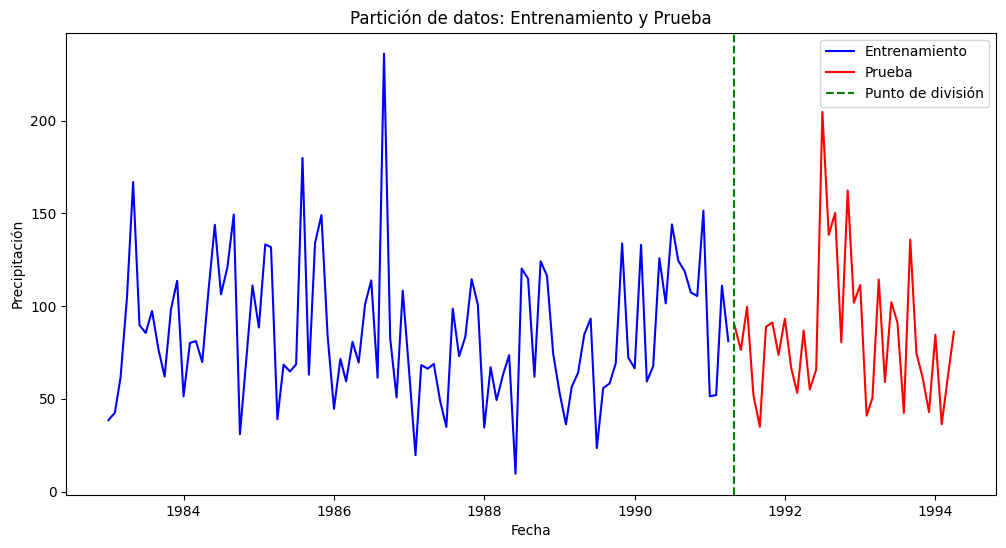

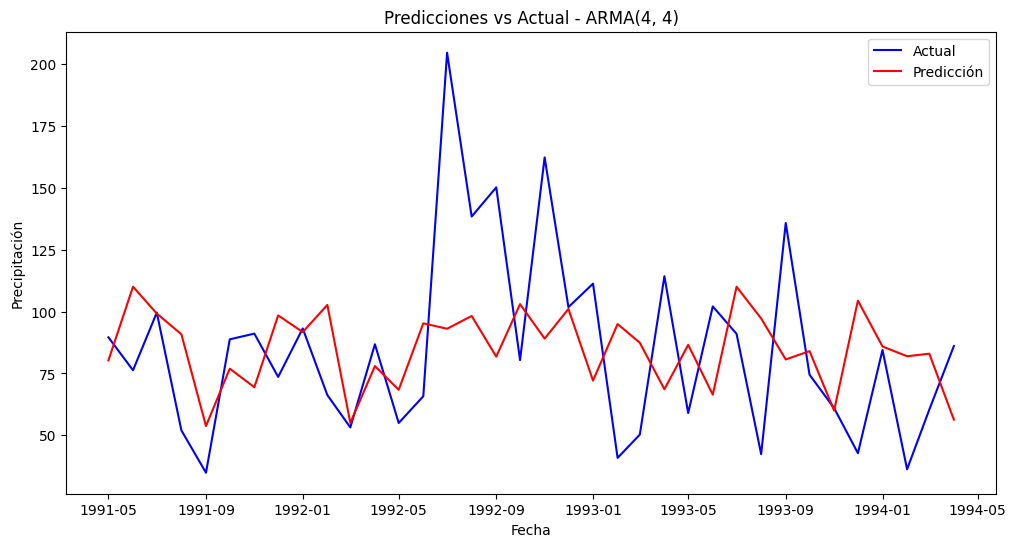

MSE para ARMA(4, 4): 1530.8372456793459


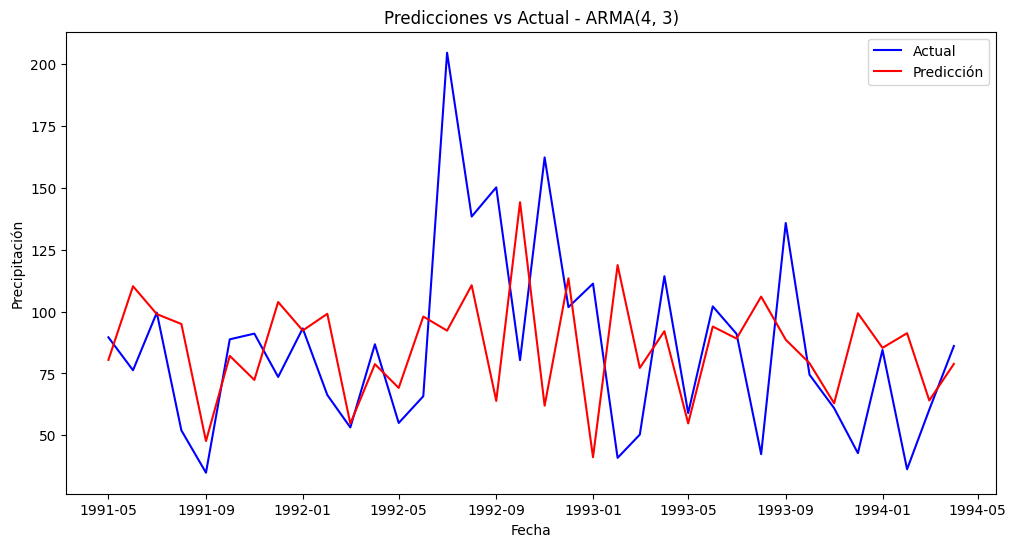

MSE para ARMA(4, 3): 1858.653110729175

El mejor modelo es ARMA(4, 4) con MSE: 1530.8372456793459

Tabla de parámetros para cada predicción:


,h,const,ar.L1,ar.L2,ar.L3,ar.L4,ma.L1,ma.L2,ma.L3,ma.L4
0,1,85.978472,0.166679,-0.159715,-0.522965,-0.148213,0.042746,0.074205,0.988595,-0.034751
1,2,86.033860,0.181134,-0.163755,-0.524603,-0.143952,0.032129,0.071292,0.984214,-0.044920
2,3,85.794323,0.137139,-0.161023,-0.535916,-0.158457,0.065404,0.079925,0.993995,-0.004206
3,4,85.886944,0.302583,-0.222565,-0.445160,-0.005423,-0.093363,0.119170,0.953668,-0.241769
4,5,85.495390,0.173388,-0.195116,-0.472552,-0.087383,0.025485,0.144085,0.959781,-0.101255
5,6,84.690511,1.077409,-0.264899,-0.337566,0.451496,-0.835204,0.001438,0.846151,-0.990490
6,7,84.277127,1.076323,-0.277478,-0.348823,0.462927,-0.836057,0.001539,0.847959,-0.989635
7,8,85.299256,1.086040,-0.297516,-0.325116,0.446902,-0.824165,0.003522,0.851058,-0.976555
8,9,85.147900,1.049142,-0.281434,-0.358592,0.462835,-0.805204,0.006424,0.852766,-0.958525
9,10,85.132130,1.071800,-0.296053,-0.338835,0.463433,-0.824000,0.003588,0.851441,-0.976055


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Asumiendo que 'data' ya está cargado y procesado como en el código anterior

# Función para realizar la validación cruzada con Rolling Forecast
def rolling_forecast(data, order, train_size=100, test_size=36):
    predictions = []
    actuals = []
    params_list = []
    for i in range(train_size, len(data)):
        train = data[:i]
        test = data[i:i+1]
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1)
        predictions.append(forecast[0])
        actuals.append(test[0])
        params_list.append(model_fit.params)
    return predictions, actuals, params_list

# Realizar validación cruzada para ambos modelos
best_orders = [best_models[0][1], best_models[1][1]]
model_predictions = []
model_actuals = []
model_mse = []
model_params = []

for order in best_orders:
    predictions, actuals, params = rolling_forecast(data['Precipitación'], order=(order[0], 0, order[1]))
    mse = mean_squared_error(actuals, predictions)
    model_predictions.append(predictions)
    model_actuals.append(actuals)
    model_mse.append(mse)
    model_params.append(params)

# Determinar el mejor modelo basado en MSE
best_model_index = np.argmin(model_mse)
best_order = best_orders[best_model_index]

# Gráfica de partición de entrenamiento y prueba
plt.figure(figsize=(12, 6))
plt.plot(data.index[:100], data['Precipitación'][:100], label='Entrenamiento', color='blue')
plt.plot(data.index[100:], data['Precipitación'][100:], label='Prueba', color='red')
plt.axvline(x=data.index[100], color='green', linestyle='--', label='Punto de división')
plt.title('Partición de datos: Entrenamiento y Prueba')
plt.xlabel('Fecha')
plt.ylabel('Precipitación')
plt.legend()
plt.show()

# Gráficas de predicciones para ambos modelos
for i, order in enumerate(best_orders):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[100:], data['Precipitación'][100:], label='Actual', color='blue')
    plt.plot(data.index[100:], model_predictions[i], label='Predicción', color='red')
    plt.title(f'Predicciones vs Actual - ARMA{order}')
    plt.xlabel('Fecha')
    plt.ylabel('Precipitación')
    plt.legend()
    plt.show()

    print(f"MSE para ARMA{order}: {model_mse[i]}")

print(f"\nEl mejor modelo es ARMA{best_order} con MSE: {model_mse[best_model_index]}")

# Crear tabla con parámetros para cada predicción
best_params = model_params[best_model_index]
p, _, q = best_order[0], 0, best_order[1]

# Determinar las columnas basadas en el mejor modelo
columns = ['h', 'const']
for i in range(1, p+1):
    columns.append(f'ar.L{i}')
for i in range(1, q+1):
    columns.append(f'ma.L{i}')

# Crear la tabla de parámetros
param_table = pd.DataFrame(columns=columns)
for h, params in enumerate(best_params, start=1):
    row = pd.DataFrame({'h': [h], **{col: [val] for col, val in zip(columns[1:], params)}})
    param_table = pd.concat([param_table, row], ignore_index=True)

print("\nTabla de parámetros para cada predicción:")
display(param_table)
